In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
names_list = ["MYCT", "MMIN","MMAX","CACH","CHMIN","CHMAX","PRP"]
hardware = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data", sep=",",header=None, names=names_list)
print(hardware)

                           MYCT   MMIN  MMAX  CACH  CHMIN  CHMAX  PRP
adviser 32/60         125   256   6000   256    16    128    198  199
amdahl  470v/7        29   8000  32000    32     8     32    269  253
        470v/7a       29   8000  32000    32     8     32    220  253
        470v/7b       29   8000  32000    32     8     32    172  253
        470v/7c       29   8000  16000    32     8     16    132  132
...                         ...    ...   ...   ...    ...    ...  ...
sperry  80/8          124  1000   8000     0     1      8     42   37
        90/80-model-3 98   1000   8000    32     2      8     46   50
sratus  32            125  2000   8000     0     2     14     52   41
wang    vs-100        480   512   8000    32     0      0     67   47
        vs-90         480  1000   4000     0     0      0     45   25

[209 rows x 7 columns]


In [ ]:
max = hardware.max(axis=0)
max = pd.Series(data=max, index=names_list)
print(max)

MYCT     32000
MMIN     64000
MMAX       256
CACH        52
CHMIN      176
CHMAX     1150
PRP       1238
dtype: int64


In [ ]:
scaler = MinMaxScaler()
hardware_scaled = scaler.fit_transform(hardware)
hardware_scaled = pd.DataFrame(hardware_scaled, columns=names_list)
print(hardware_scaled)

         MYCT      MMIN   MMAX      CACH     CHMIN     CHMAX       PRP
0    0.006012  0.092843  1.000  0.307692  0.727273  0.167832  0.150450
1    0.248497  0.499499  0.125  0.153846  0.181818  0.229895  0.194603
2    0.248497  0.499499  0.125  0.153846  0.181818  0.187063  0.194603
3    0.248497  0.499499  0.125  0.153846  0.181818  0.145105  0.194603
4    0.248497  0.249249  0.125  0.153846  0.090909  0.110140  0.095666
..        ...       ...    ...       ...       ...       ...       ...
204  0.029309  0.124124  0.000  0.019231  0.045455  0.031469  0.017989
205  0.029309  0.124124  0.125  0.038462  0.045455  0.034965  0.028618
206  0.060621  0.124124  0.000  0.038462  0.079545  0.040210  0.021259
207  0.014028  0.124124  0.125  0.000000  0.000000  0.053322  0.026165
208  0.029309  0.061562  0.000  0.000000  0.000000  0.034091  0.008177

[209 rows x 7 columns]


In [ ]:
train, test = train_test_split(hardware_scaled, test_size=0.30, shuffle=True)
print(len(train))
print(len(test))
x_train=train[names_list]
y_train=train['PRP'].ravel()

x_test=test[names_list]
y_test=test['PRP'].ravel()


146
63


In [ ]:
reg = MLPRegressor(solver= 'lbfgs',learning_rate='constant',learning_rate_init=0.001 ,hidden_layer_sizes=(100,50,),activation='logistic',random_state=1, max_iter=500, verbose=True)
history=reg.fit(x_train, y_train)


In [ ]:
y_pred=reg.predict(x_test)
r2=r2_score(y_test,y_pred)
print(x_test[:10])
print(y_test[:10])
print(y_pred[:10])


print('r2',r2)

         MYCT      MMIN      MMAX      CACH     CHMIN     CHMAX       PRP
202  0.006200  0.061562  0.000000  0.019231  0.017045  0.010490  0.007359
180  0.060621  0.124124  0.125000  0.019231  0.073864  0.090035  0.031071
33   0.080035  0.162913  0.117188  0.230769  0.136364  0.049825  0.048242
186  0.123246  0.249249  0.125000  0.076923  0.068182  0.108392  0.068684
146  0.123246  0.249249  0.250000  0.096154  0.045455  0.076049  0.083401
199  0.248497  1.000000  0.500000  0.230769  1.000000  1.000000  0.787408
132  0.029309  0.124124  0.093750  0.038462  0.034091  0.017483  0.025348
173  0.014028  0.061562  0.000000  0.019231  0.039773  0.016608  0.007359
12   0.060621  0.124124  0.253906  0.019231  0.045455  0.075175  0.044971
35   0.162074  0.326983  0.117188  0.230769  0.136364  0.176573  0.098937
[0.00735895 0.03107114 0.04824203 0.06868357 0.08340147 0.78740801
 0.02534751 0.00735895 0.04497138 0.09893704]
[-0.01040752  0.03940638  0.05146126  0.09296816  0.09226753  0.68175708


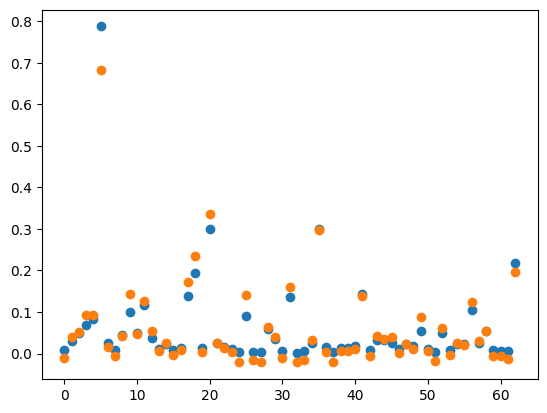

In [ ]:
plt.scatter(range(len(x_test)),y_test)
plt.scatter(range(len(x_test)),y_pred)

In [ ]:
y_pred= reg.predict(x_test)
print('MSE =', mean_squared_error(y_test,y_pred))
print('R2 =', r2_score(y_test,y_pred))

MSE = 0.00047910782329564595
R2 = 0.962399410860303
